In [47]:
from utils import *
SEED = 0

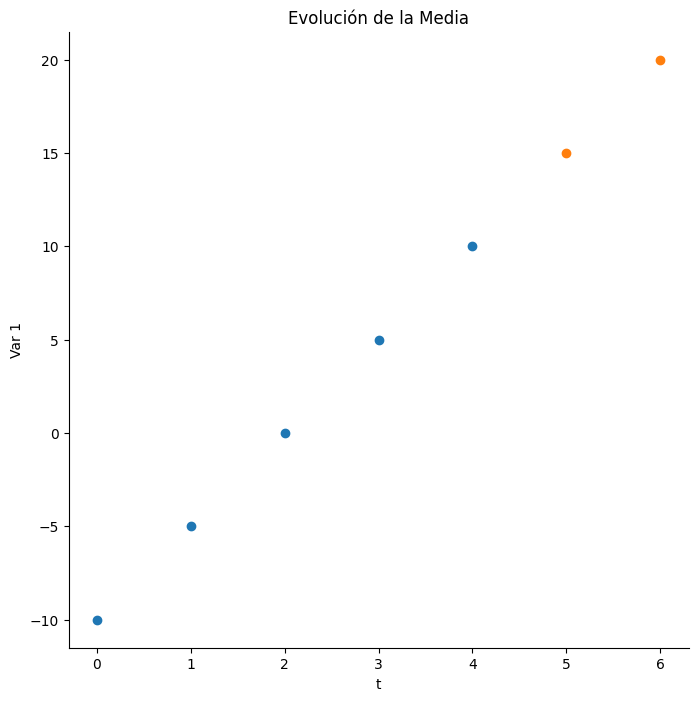

In [48]:
plt.figure(dpi=100, figsize=(8,8))
plt.scatter(x=range(0,5), y=np.arange(start=-10, stop=15, step=5))
plt.scatter(x=range(5,7), y=np.arange(start=15, stop=25, step=5))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Var 1')
plt.xlabel('t')
plt.title('Evolución de la Media')
plt.show()

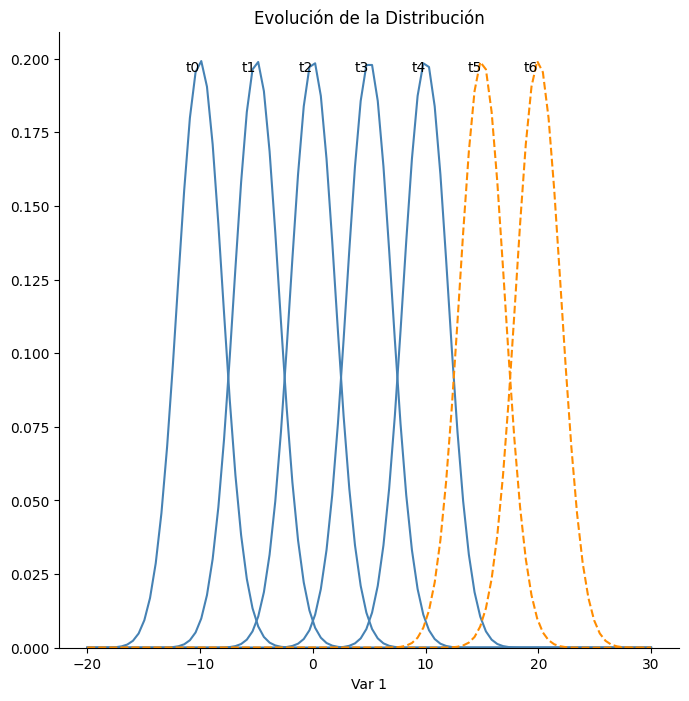

In [49]:
x = np.linspace(start=-20, stop=30, num=100)
plt.figure(dpi=100, figsize=(8,8))

t = 0
for loc in np.arange(-10,15,5):
  plt.plot(x, norm.pdf(x=x, loc=loc, scale=2), 'steelblue')
  plt.text(loc, norm.pdf(loc, loc, scale=2), 't'+str(t), horizontalalignment='right', verticalalignment='top')
  t += 1

for loc in np.arange(15,25,5):
  plt.plot(x, norm.pdf(x=x, loc=loc, scale=2), 'darkorange', linestyle='dashed')
  plt.text(loc, norm.pdf(loc, loc, scale=2), 't'+str(t), horizontalalignment='right', verticalalignment='top')
  t += 1

plt.gca().set_ylim(bottom=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Evolución de la Distribución')
plt.xlabel('Var 1')
plt.show()

In [50]:
# Para generación de datos
VARS = ['var1']
T = 20
H_STEPS = 2
TIME_PERIODS = np.arange(T)
PREDICT_RANGE = range(T, T+H_STEPS)
N_SAMPLES = 1000

In [51]:
data = []

sigma = 1
offset = 10

for t in TIME_PERIODS:
    samples = np.append(
          np.random.normal(loc=t, scale=sigma, size=[ N_SAMPLES//2, len(VARS) ]),
          np.random.normal(loc=T - t, scale=sigma, size=[ N_SAMPLES//2, len(VARS) ])
      )
    samples = pd.DataFrame(samples, columns = VARS)
    samples['time'] = t
    data.append(samples)

data = pd.concat(data, ignore_index=True)

# Ajusto KDEs
kdes = get_kdes(data, VARS[0], 'time', TIME_PERIODS)

grid_points = np.linspace(data.var1.min()-offset, data.var1.max()+offset, N_SAMPLES)
data_matrix = [kdes[t].score_samples(grid_points.reshape(-1,1)) for t in TIME_PERIODS]


true = []
    
for t in PREDICT_RANGE:

    samples = np.append(
          np.random.normal(loc=t, scale=sigma, size=[ N_SAMPLES//2, len(VARS) ]),
          np.random.normal(loc=T - t, scale=sigma, size=[ N_SAMPLES//2, len(VARS) ])
      )
    samples = pd.DataFrame(samples, columns=VARS)
    samples['time'] = t
    true.append(samples)

true = pd.concat(true, ignore_index=True)

true_kdes = get_kdes(true, VARS[0], 'time', PREDICT_RANGE)

true_data_matrix = [true_kdes[t].score_samples(grid_points.reshape(-1,1)) for t in PREDICT_RANGE]

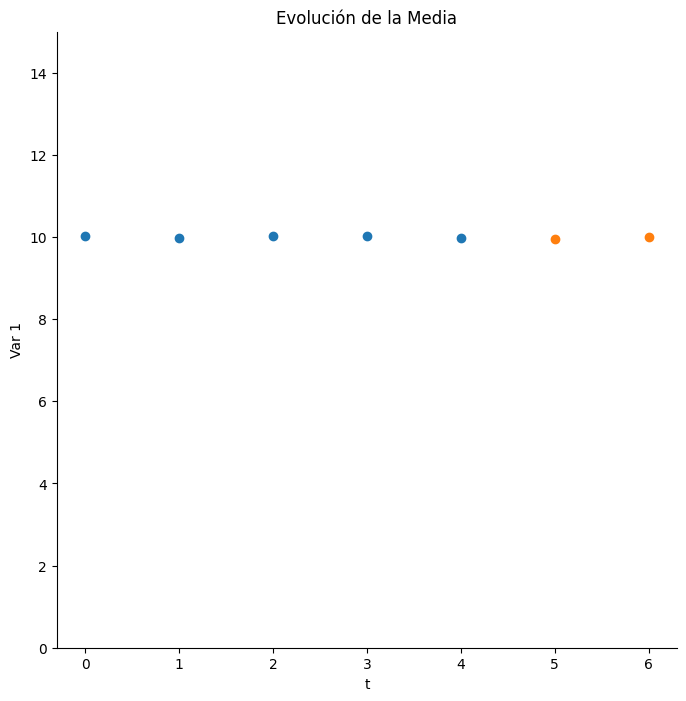

In [52]:
plt.figure(dpi=100, figsize=(8,8))


means = data.groupby('time').var1.mean()
means = means.iloc[-5:].reset_index(drop=True)

true_means = true.groupby('time').var1.mean()

plt.scatter(x=means.index, y=means.values)
plt.scatter(x=range(5,7), y=true_means.values)
plt.ylim((0,15))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Var 1')
plt.xlabel('t')
plt.title('Evolución de la Media')
plt.show()

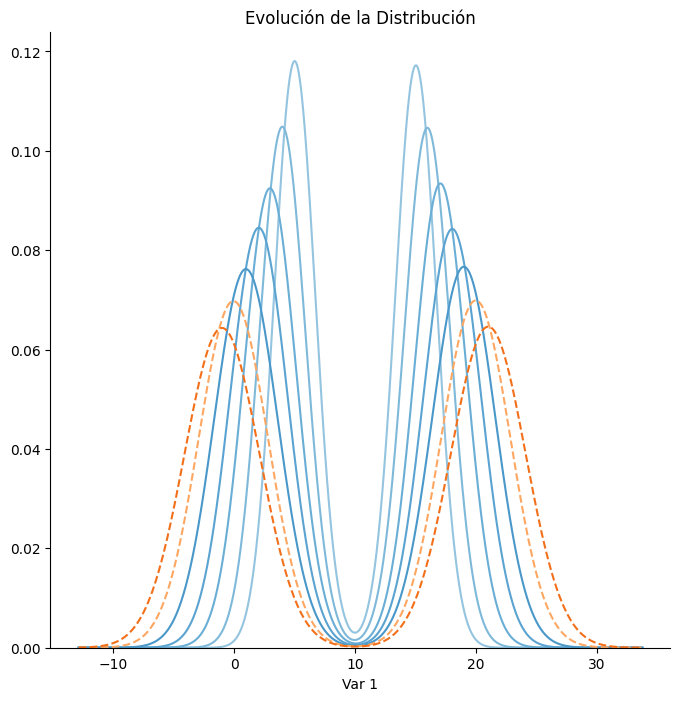

In [54]:
plt.figure(dpi=100, figsize=(8,8))

for i, d in zip(np.linspace(0.4,0.6, 5), data_matrix[-5:]):
  plt.plot(grid_points, np.exp(d), color=BLUE(i))

for i, d in zip(np.linspace(0.4,0.6, H_STEPS), true_data_matrix):
  plt.plot(grid_points, np.exp(d), color=ORANGE(i), linestyle='dashed')

plt.plot([], [], color='steelblue', label='samples')
plt.plot([], [], color='orange', label='true')
plt.gca().set_ylim(bottom=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Evolución de la Distribución')
plt.xlabel('Var 1')
plt.show()